<a href="https://colab.research.google.com/github/psampatganesh27-debug/California-housing-predictions/blob/main/housing_project_v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
from sklearn.datasets import fetch_california_housing


In [2]:
housing = fetch_california_housing(as_frame=True)

# We'll put all our features and the target into one big DataFrame
df = housing.frame

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [4]:
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

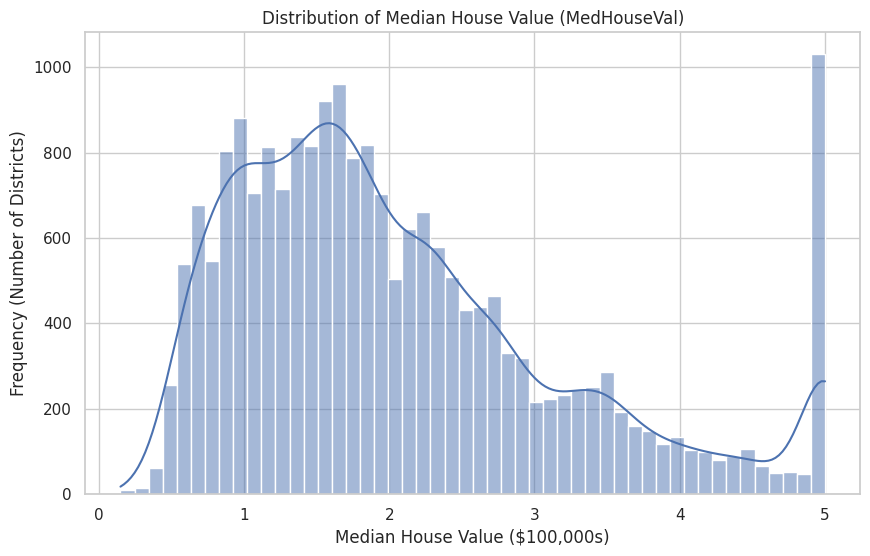

In [6]:
# Setting the style
sns.set(style="whitegrid")

# Creating a histogram for the median house value
plt.figure(figsize=(10, 6))
sns.histplot(df['MedHouseVal'], bins=50, kde=True)
plt.title('Distribution of Median House Value (MedHouseVal)')
plt.xlabel('Median House Value ($100,000s)')
plt.ylabel('Frequency (Number of Districts)')
plt.show()

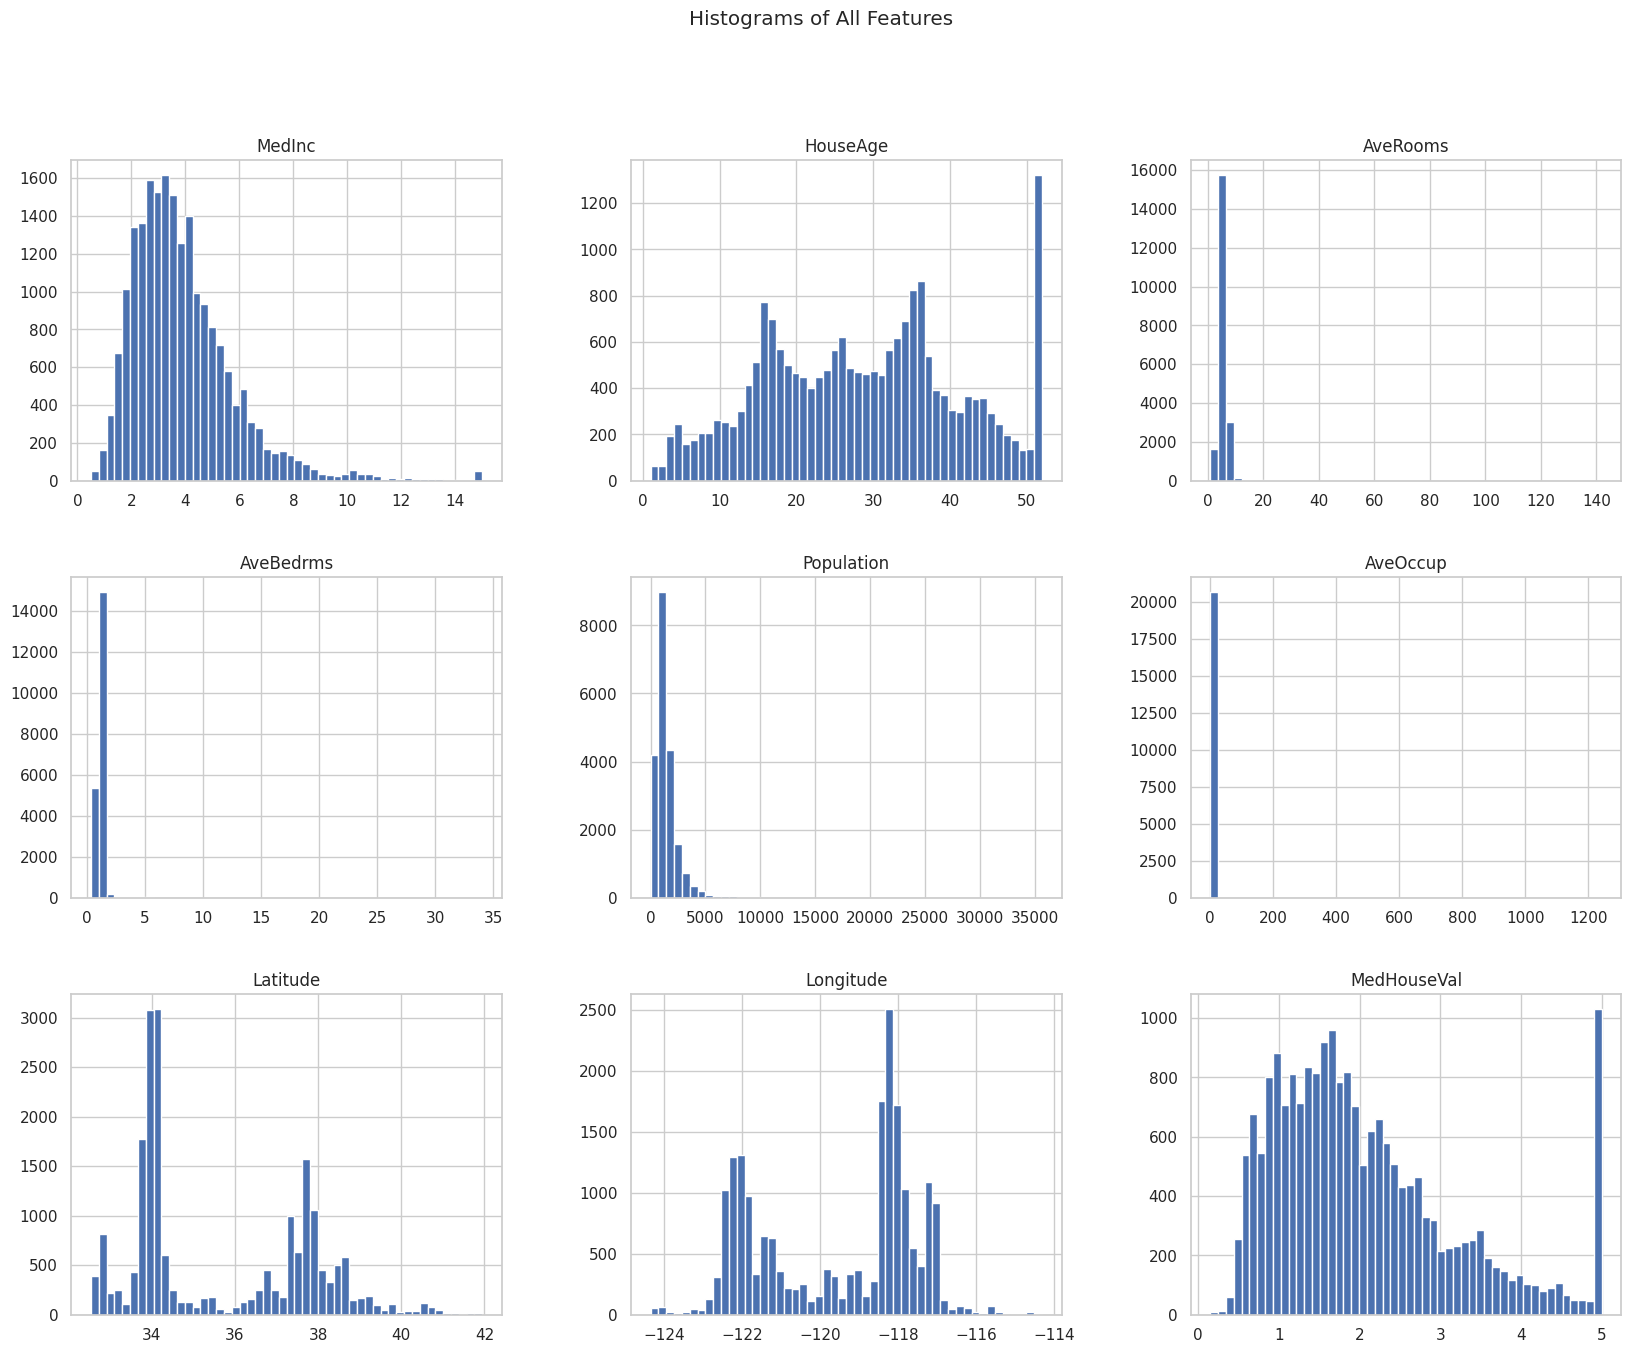

In [7]:
# Plotting histograms for all numerical features
df.hist(bins=50, figsize=(20, 15))
plt.suptitle('Histograms of All Features')
plt.show()

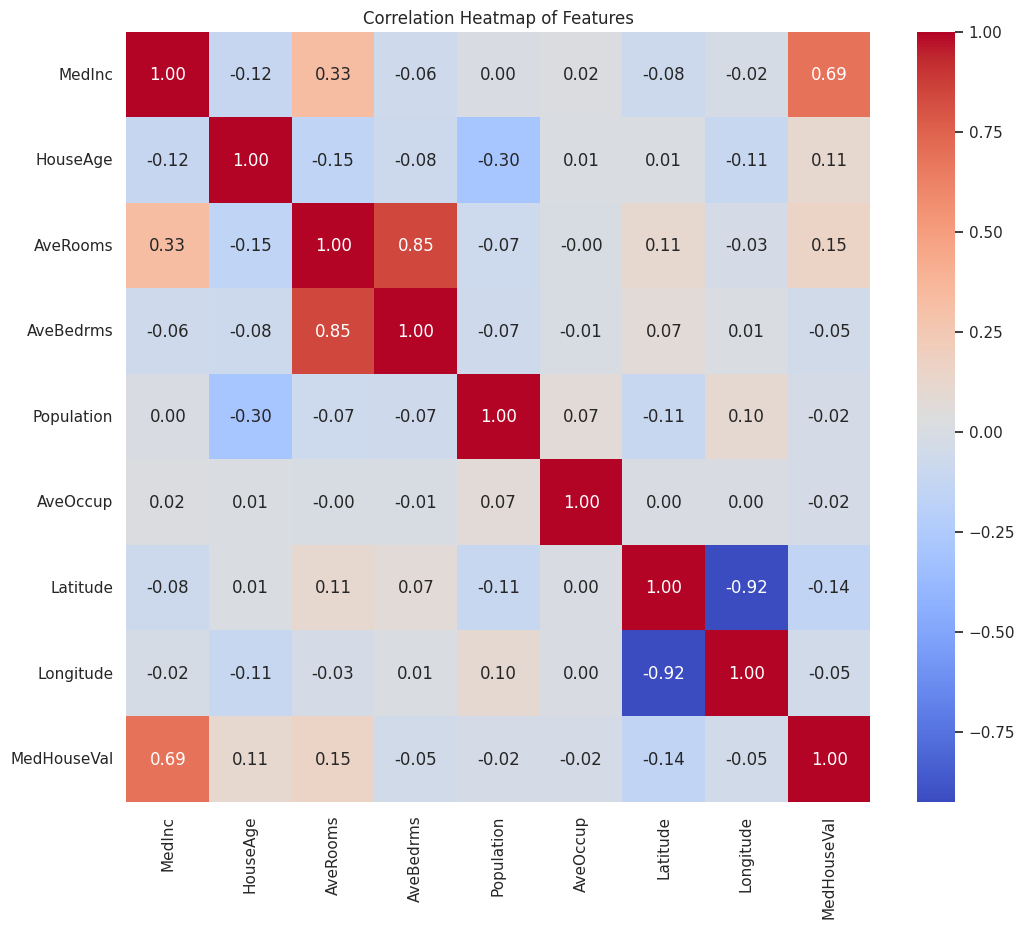

In [8]:
# Calculate correlations
corr_matrix = df.corr()

# Plot the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Heatmap of Features')
plt.show()

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
# 'df' is our complete dataset from before
train_set, test_set = train_test_split(df, test_size=0.2, random_state=42)

print(f"Total rows in original data: {len(df)}")
print(f"Rows in training set: {len(train_set)}")
print(f"Rows in test set: {len(test_set)}")

Total rows in original data: 20640
Rows in training set: 16512
Rows in test set: 4128


Applying feature engineering...
Starting GridSearchCV... (This may take a few minutes)
GridSearch finished.
Best parameters found:
{'model__max_features': 6, 'model__n_estimators': 70}

Best RMSE from GridSearch: 0.5111736850316015

Plotting feature importance...


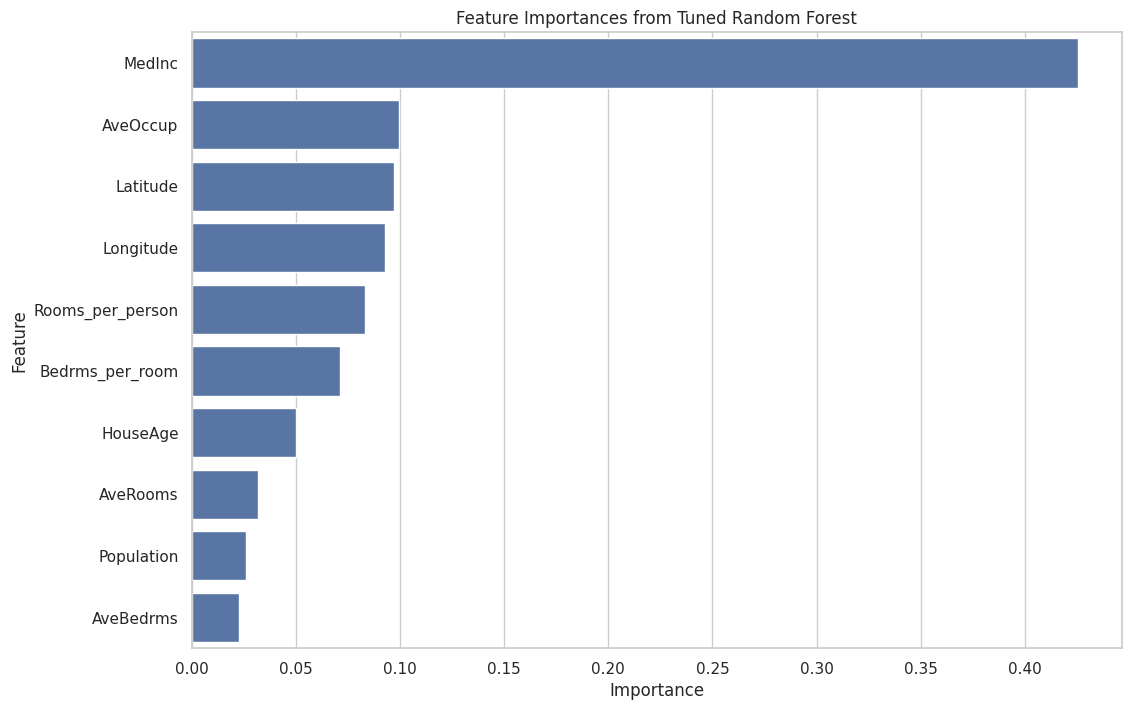


Feature Importance Table:
            Feature  Importance
0            MedInc    0.425337
5          AveOccup    0.099629
6          Latitude    0.096913
7         Longitude    0.092966
8  Rooms_per_person    0.083370
9   Bedrms_per_room    0.071191
1          HouseAge    0.050208
2          AveRooms    0.031729
4        Population    0.026094
3         AveBedrms    0.022562


In [11]:
# We're running this entire script in one go
# This assumes 'train_set' and 'test_set' exist from your data split.

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error

# --- 1. Feature Engineering Function ---
# (The function we tried to add before)
def create_new_features(df):
    data = df.copy()
    data['Rooms_per_person'] = data['AveRooms'] / data['AveOccup']
    data['Bedrms_per_room'] = data['AveBedrms'] / data['AveRooms']
    return data

# --- 2. Apply Feature Engineering ---
# We apply this function IMMEDIATELY after the train/test split.
print("Applying feature engineering...")
train_set = create_new_features(train_set)
test_set = create_new_features(test_set)

# --- 3. Separate Features and Labels ---
# NOW we create our X and y variables.
# 'housing_features' will now contain the new columns.
housing_labels = train_set['MedHouseVal'].copy()
housing_features = train_set.drop('MedHouseVal', axis=1)

# --- 4. Build the Full Pipeline ---
# This pipeline will now process our new features.
forest_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('model', RandomForestRegressor(random_state=42))
])

# --- 5. Define the Tuning Grid ---
# We'll use a SLIGHTLY simpler grid to make it run faster
# for this test.
param_grid = [
    {'model__n_estimators': [50, 70],
     'model__max_features': [6, 8, 10]} # Added 10 since we have more features
]

# --- 6. Create and Run GridSearchCV ---
print("Starting GridSearchCV... (This may take a few minutes)")
grid_search = GridSearchCV(forest_pipeline, param_grid, cv=5,
                           scoring='neg_mean_squared_error',
                           return_train_score=True)

grid_search.fit(housing_features, housing_labels)
print("GridSearch finished.")

# --- 7. Get Best Model and Score ---
print("Best parameters found:")
print(grid_search.best_params_)

best_rmse = np.sqrt(-grid_search.best_score_)
print(f"\nBest RMSE from GridSearch: {best_rmse}")

# --- 8. Get Feature Importance (The Fix) ---
# This is the part that failed.
# It will work now because all variables are defined
# in the correct order in this one script.

print("\nPlotting feature importance...")

# Get the best, fully-trained model
final_model = grid_search.best_estimator_

# Get the 'model' step (the Random Forest) from the pipeline
rf_model = final_model.named_steps['model']

# Get the list of feature names from our 'housing_features' DataFrame
feature_names = list(housing_features.columns)

# Get the importance scores from the model
importances = rf_model.feature_importances_

# Create a DataFrame, sort it, and plot it
feature_importance_df = pd.DataFrame(
    {'Feature': feature_names, 'Importance': importances}
).sort_values(by='Importance', ascending=False)

# Plot the results
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importances from Tuned Random Forest')
plt.show()

# Print the table for clarity
print("\nFeature Importance Table:")
print(feature_importance_df)

Evaluating final model on the test set...

--- Final Model Scores (on Test Set) ---
Final RMSE: 0.5057028017298477
Final R-squared (R²): 0.804843123083056

Plotting error analysis...


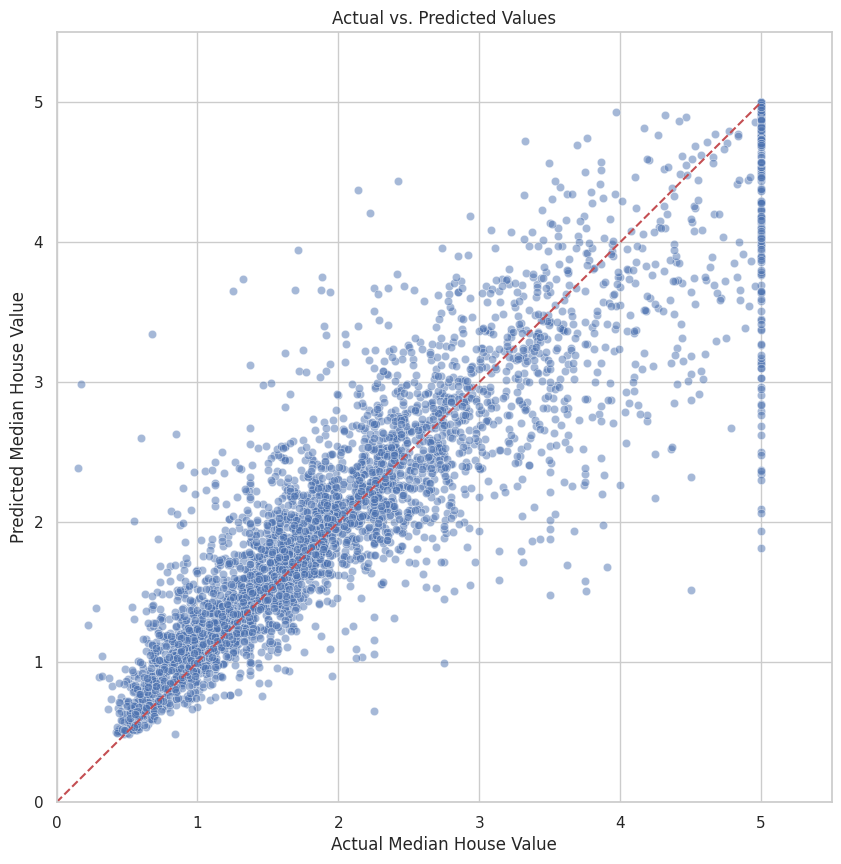

In [12]:
from sklearn.metrics import r2_score

# --- 9. Final Evaluation on the Test Set ---
print("Evaluating final model on the test set...")

# 'final_model' is our best tuned pipeline from grid_search
# 'test_set' is our locked-away data

# Prepare the test data (separate X and y)
X_test = test_set.drop('MedHouseVal', axis=1)
y_test = test_set['MedHouseVal'].copy()

# Make final predictions
final_predictions = final_model.predict(X_test)

# Get the final scores
final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)
final_r2 = r2_score(y_test, final_predictions)

print(f"\n--- Final Model Scores (on Test Set) ---")
print(f"Final RMSE: {final_rmse}")
print(f"Final R-squared (R²): {final_r2}")

# --- 10. Error Analysis Plot ---
# This is the most important new part.
# We'll plot Predictions vs. Actual Values.

print("\nPlotting error analysis...")

# Create a DataFrame for easy plotting
results_df = pd.DataFrame({
    'Actual': y_test,
    'Predicted': final_predictions
})

# Create the scatter plot
plt.figure(figsize=(10, 10))
sns.scatterplot(x='Actual', y='Predicted', data=results_df, alpha=0.5)
plt.plot([0, 5], [0, 5], 'r--') # Add a red line (y=x) for reference
plt.title('Actual vs. Predicted Values')
plt.xlabel('Actual Median House Value')
plt.ylabel('Predicted Median House Value')
plt.axis([0, 5.5, 0, 5.5]) # Set axis limits
plt.grid(True)
plt.show()